# Recap

LlamaIndex is a framework designed to enhance the capabilities of LLM's by integrating RAG systems. Allos LLM-based application to get information using vector stores, nodes ...

This folder will cover vector stores and their importance in semantic search, the role of data connectors and LlamaHub in data ingestion, the creation of node objects from documents, and the indexing of data for quick retrieval.

## Preprocessing the data

### Document loaders

In this part we will use **document loaders**, a too ltha simplify the process of loading data into documents, and split texts into smaller chunks for better processing. Finally, the indexing process creates a structured database of information that the language model can query.

In [2]:
from langchain.document_loaders import CSVLoader

loader = CSVLoader('customers-100.csv') # Create a loader from a CSV file
documents = loader.load() # Load documents

# Get the content and metadata of each document
for document in documents:
    content = document.page_content
    metadata = document.metadata
    print("Content data : ")
    print(content)
    print("Metadata : ")
    print(metadata)

Content data : 
Index: 1
Customer Id: DD37Cf93aecA6Dc
First Name: Sheryl
Last Name: Baxter
Company: Rasmussen Group
City: East Leonard
Country: Chile
Phone 1: 229.077.5154
Phone 2: 397.884.0519x718
Email: zunigavanessa@smith.info
Subscription Date: 2020-08-24
Website: http://www.stephenson.com/
Metadata : 
{'source': 'customers-100.csv', 'row': 0}
Content data : 
Index: 2
Customer Id: 1Ef7b82A4CAAD10
First Name: Preston
Last Name: Lozano
Company: Vega-Gentry
City: East Jimmychester
Country: Djibouti
Phone 1: 5153435776
Phone 2: 686-620-1820x944
Email: vmata@colon.com
Subscription Date: 2021-04-23
Website: http://www.hobbs.com/
Metadata : 
{'source': 'customers-100.csv', 'row': 1}
Content data : 
Index: 3
Customer Id: 6F94879bDAfE5a6
First Name: Roy
Last Name: Berry
Company: Murillo-Perry
City: Isabelborough
Country: Antigua and Barbuda
Phone 1: +1-539-402-0259
Phone 2: (496)978-3969x58947
Email: beckycarr@hogan.com
Subscription Date: 2020-03-25
Website: http://www.lawrence.com/
Metadat

The are some loaders developed for specific public places, like `Wikipedia`. In that case, you can use the `WikipediaLoader` object.

Another important loader is `UnstructuredUrlLoader`, which allows to get information from public web pages. That tool would be interesting for web scratching. 

In [3]:
from langchain_community.document_loaders import WikipediaLoader

# Load data from Wikipedia given a topic
loader = WikipediaLoader("Machine_learning")
document = loader.load()
print(document)

[Document(metadata={'title': 'Machine learning', 'summary': 'Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions. Quick progress in the field of deep learning, beginning in 2010s, allowed neural networks to surpass many previous approaches in performance.\nML finds application in many fields, including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine. The application of ML to business problems is known as predictive analytics.\nStatistics and mathematical optimization (mathematical programming) methods comprise the foundations of machine learning. Data mining is a related field of study, focusing on exploratory data analysis (EDA) via unsupervised learning. \nFrom a theoretical viewpoint, probably approximately correct (PAC) learning pro

**There's also some loaders to handle propietary sources, like `MongodbLoader`, for loading documents from a MongoDB database.**

### Document transformers

The `document transformers` are tools to fetch only the relevant details of documents. This involves several steps : 

The first one is divide the text in chunks. It's important that in the chunking process, the data segments generated are smaller than the maximum input size of the LLM that is going to be used. Langchain offers this 3 chunking strategies : 

-   **Fixed-size chunks** : Define a fixed size. Allows some overlap between chunks. Overlapping ensures continuity and context preservation, improving accuracy and coherence of the generated chunks. One class to execute this strategy is `CharacterTextSplitter`.
-   **Variable-sized chunks** : Chunks based on content characteristics, like end-of-sentence. It ensures the preservation of coherent and contextually intact of the content of each chunk. This strategy can be executed with `RecursiveCharacterTextSplitter`.
-   **Customized chunking** : When dealing with large documents, is recommended to use variable-sized chunks but also append the document title to chunks from tho the middle of the document to prevent content loss. This can be done with `MarkdownHeaderTextSplitter`.

So, as summary, chunking provides you the capacity of divide a large document into small documents that can be processed by the selected LLM model. However, the main drawback of this strategy is the possibility of losing context information of each segment.

### Indexing

This process means storing and organizing data from various sources into a vector store. This process consists of storing chunk along with an embedding representation of it, which captures the meaning of it's text and makes easy to retrieve/select a chunk by semantic similarity. This embedding are generated by embedding models, such as `OpenAIEmbeddings` models.

## Models

### LLM

In this step, **we will create an instance of a Ollama model**. Please, follow these instructions to install all the dependencies required : [link](https://python.langchain.com/docs/integrations/llms/ollama/).

**Note** : You have to run the following command in your computer to install the embedding model used in the following code : `ollama run llama3.1`

In [6]:
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage, SystemMessage

chat = ChatOllama(model="llama3.1:8b", temperature=0.1) # Load the chat model
messages = [ # Create a context description for the chat
    SystemMessage(
        content="You are a helpful assistant."
    ), # Create an input from a human
    HumanMessage(
        content="What is the capital of Australia?"
    )
]

response = chat.invoke(messages) # Get an AI message based on the HumanMessage and SystemMessage
print(response)
print(type(response))

content='The capital of Australia is Canberra. Would you like to know more about Canberra or Australia in general?' additional_kwargs={} response_metadata={'model': 'llama3.1:8b', 'created_at': '2024-10-02T15:13:02.376106Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 794369400, 'load_duration': 69445000, 'prompt_eval_count': 28, 'prompt_eval_duration': 277413000, 'eval_count': 21, 'eval_duration': 443885000} id='run-7b824c01-b40c-4e99-84e8-572b53c0355f-0' usage_metadata={'input_tokens': 28, 'output_tokens': 21, 'total_tokens': 49}


There's 3 types of messages in Langchain : 

-   **SystemMessage** : Sets the behaviour of the chat model, giving a context and instructions to the model. 
-   **HumanMessage** : To store the user's prompts sent to the model.
-   **AIMessage** : Represent the responses of the model.

It should be highlighted that **HumanMessage** and **AIMessage** can be used to create an history about the conversation that the chat can use in the next interactions.

### Embedding Models

The embedding models are models that transform text into vector representations, enabling operations like semantic search through text similaruty in vector space. The `embed_method()` is the most used method to embed multiple texts, providing a list of vector representations.

**Note** : You have to run the following command in your computer to install the embedding model used in the following code : `ollama run llama3.1`

In [14]:
from langchain_ollama.embeddings import OllamaEmbeddings

# Create the embedding model
embedding_model = OllamaEmbeddings(model="llama3.1")

# Embed a list of texts
embeddings = embedding_model.embed_documents(
    ["Hi there!", "Oh, hello!", "What's your name?"]
)

print(f"Number of documents embedded : {len(embeddings)}")
print(f"The length of each embedding is : {len(embeddings[0])}")

Number of documents embedded : 3
The length of each embedding is : 4096


So, each phrase/text would be stored into a embedding of 4096 components.

### Vector stores

The use of embeddings for indexing and giving a context for each chunk obtained requires the creation of databases for storing and searching effectively these embeddings.

Traditional databases are not optimized for this purpose. However, vector stores are built to handle this type of data. They offer speed, scalability and precision.

## Retrievers

`Retrievers` are interfaces that return documents in response to a query. The most straightforward approach is to use basic similarity metrics like the `cosine similarity`. This method compares the embeddings of the question and potential answers, ensuring that the response generated is semantically aligned with the query.This method narrows down the most contextually relevant information from a vast dataset, improving the precision and relevance of the responses. In other words, measures the similarity between the user's prompt and the documents.

However, Langchain offers more advanced methods like : 

-   **Parent Document Retriever** : Instead of working with a whole documents, it uses the chunks generated from all the documents and the embeddings generated. This methods extracts the chunk with the highest similarity with the prompt, and give the parent document of that chunk to the model as context information.
-   **Self-Query Retriever** : This method not only uses semanthical data, but also generates filters based on the user prompt's and the metadata of the documents. Sometimes user's prompt contains some logical information that can be represented as metadata filters. 

## Chains

A chain in Langchain is a harcoded union of different elements to perform a task. Each component of the chain uses the output of the previous component in the chain as input. There are two types of chains : **LLMChain** and **SequentialChain**.

### LLMChain

This chain transforms the user's prompt using a `PromptTemplate`, an object that can interact with the model. This objects accepts a string, the user question, as well as other parameters.

In [16]:
from langchain.chains import LLMChain
from langchain_ollama.chat_models import ChatOllama
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

chat = ChatOllama(model="llama3.1:8b", temperature=0.1) # Create the chat model
template = "List all the color in the rainbow." # Create the template/user's message
prompt = PromptTemplate(template=template, # User's question
                        input_variables=[], # There's no input variables
                        output_parser=StrOutputParser() # Parser to give a string format to the output
                        )
chain = LLMChain(prompt=prompt, llm=chat)
response = chain.predict()
print(response)

C:\Users\aleja\AppData\Local\Temp\ipykernel_25996\3643495191.py:12: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(prompt=prompt, llm=chat)


Here are the colors of the rainbow, in order:

1. **Red**
2. **Orange**
3. **Yellow**
4. **Green**
5. **Blue**
6. **Indigo**
7. **Violet**

You can also remember them using the acronym ROYGBIV!


As you can see in the previous warning, this method is deprecated. Now the most common implementation is the **LangChain Expression Language(LCEL)** scheme to make code more readable. It works exactly as the previous option, but it's easier to understand hwo it works.

In [18]:
from langchain_ollama.chat_models import ChatOllama
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

prompt = PromptTemplate.from_template("List all the colors in a {item}") # We define the prompt, but in this case there's the input variable 'item'
chat = ChatOllama(model="llama3.1:8b", temperature=0.1) # Create the chat model
# Generate the chain with this new format
chain = prompt | chat | StrOutputParser()
response = chain.invoke({"item":"rainbow"}) # Invoke the chain with the input variable 'item' equals to 'rainbow'
print(response)

Here are the 7 colors of a rainbow, in order:

1. **Red**
2. **Orange**
3. **Yellow**
4. **Green**
5. **Blue**
6. **Indigo**
7. **Violet**

You can also remember them using the acronym ROYGBIV!


### Sequential Chain

A Sequential Chain it's a more advanced structure which allows to make a series of subsequent call to an LLM. This structure is useful for using an output of a call as input for the next call. It allows streamlining the process, as well as enables more complex interactions across various applications.

In [20]:
from langchain_core.prompts import PromptTemplate

post_prompt = PromptTemplate.from_template(
    """You are a business owner. Given the theme of a post, write a social media post to share on my socials.
    
    Theme : {theme}
    Content : This is social media post based on the theme above:
    """

)
review_prompt = PromptTemplate.from_template(
    """You are an expert social media manager. Given the presented social media post, it is your job to write a review for the post.

    Social media post : 
    {post}
    Review from a Social Media Expert:
    """
)

from langchain_ollama.chat_models import ChatOllama
from langchain_core.output_parsers import StrOutputParser

llm = ChatOllama(model="llama3.1:8b", temperature=0.1)
chain = (
    {"post" : post_prompt | llm | StrOutputParser()} # LLM generates an output with string format from the 'post_prompt' --> Generates the social media post.
    | review_prompt # Review prompt
    | llm # Call again the LLM --> Generates the evaluation of the social media post.
    | StrOutputParser() # Generates an output with string format
)

response = chain.invoke(
    {
        "theme" : "Having a black friday sale with 50% off on everything."
    }
)
print(response)

**Social Media Post Review**

**Overall Score: 8/10**

**Strengths:**

1. **Clear Call-to-Action (CTA)**: The post clearly communicates the Black Friday sale details, including the discount percentage and the code to use at checkout.
2. **Emotional Engagement**: The use of phrases like "SHOP 'TIL YOU DROP!" and "Hurry, this offer won't last long!" creates a sense of urgency and excitement, encouraging users to take action.
3. **Visual Hierarchy**: The bold font and capital letters used for the title ("BLACK FRIDAY ALERT!") effectively grab attention and make the post stand out in a crowded feed.

**Weaknesses:**

1. **Lack of Personalization**: While the post thanks customers, it feels somewhat generic and doesn't address individual users by name or reference their specific interests.
2. **Overemphasis on Discounts**: The focus solely on discounts might lead to a "deals-only" mentality among customers, potentially undermining the brand's value proposition.
3. **Limited Engagement Oppor

## Memory

Memory is the key point on maintaining context on dialogues. Langchain's memory allows to store input and output messages in a structured manner. With memoty the system can offer more personalized and relevant information by remembering and referring to past interactions..

**LlamaIndex** is a framework to connect data and LLM's. This data will be loaded into a some type of structure that later will receive the LLM.

## Overview of RAG and it's components with LlamaIndex

The main objective of retrieval augmentation is to put some context to the prompt

The way RAG works is 

1.  A documents is loaded and divided into chunks. This chunks processed by a embedding model .Finally,  their vector representations are stored into a vector database. **This first step is the data ingestion**.
2.  **The second step is data querying(retrieval+synthesis)**. At this step, chunks of data are extracted from the vector database, based on the similarity with the user's prompt, and given as context to the LLM. You can extract the l-most similar chunks from the vector database and plug them to the synthesis module.

So, the main component's in this framework are these : 

-   *LlamaHub (Data ingestion)* : Connect to your existing data, like PDF's, doc's, DDBB's...
-   *Data Structures* : Store and index your data for different use cases. It can be integrated with different DDBB's, like vector db.
-   *Queries* : Retrieve and query over the stored data in the data structures. This includes agents, QA, summarization, ... 

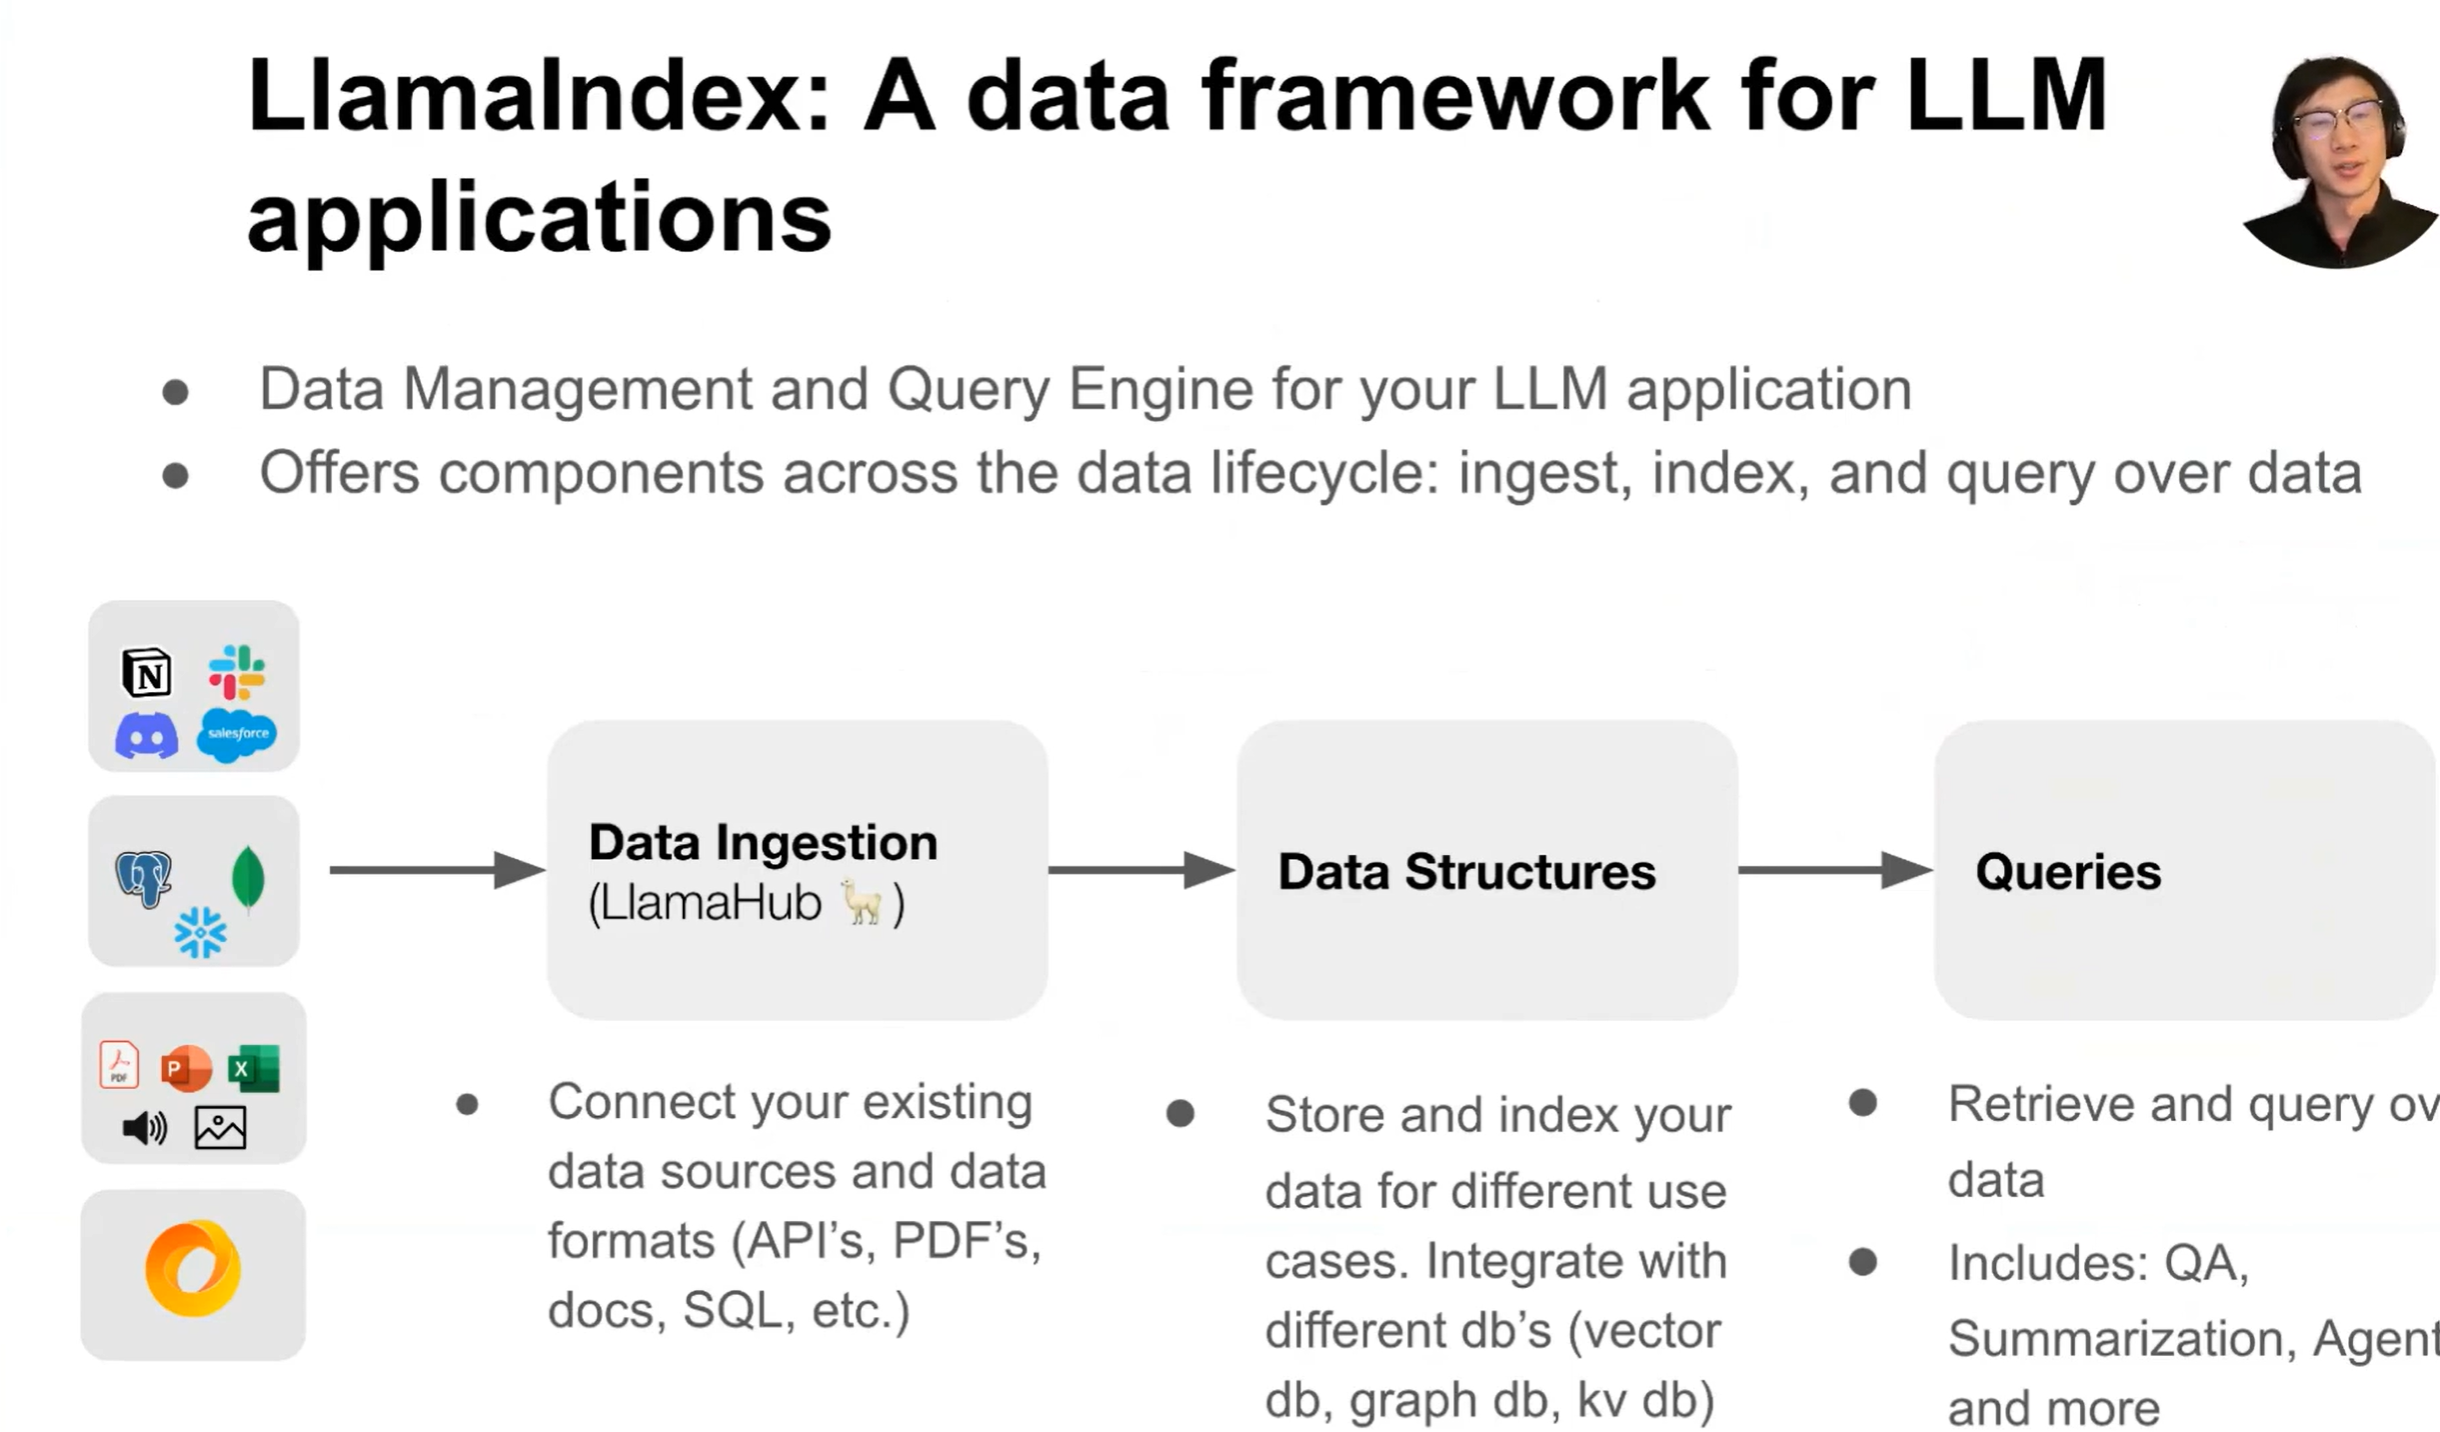